## Data Importing and Cleaning  ##
In this notebook, we have covered the steps taken to import and clean the datasets. 

In [ ]:
# Importing Basic Packages

import json
import csv
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm, tqdm_notebook, tnrange

# Display Settings

pd.set_option('display.max_columns', 50)

There are five files in the Yelp Dataset. However, for our purposes, we are only working on the business, review and user files. 

In [ ]:
from google.colab import drive 

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


### **Business File** 

In [ ]:
# Importing Yelp Business JSON File

business = []

with open("/content/drive/MyDrive/yelp_academic_dataset_business.json") as f:
  for line in f:
      business.append(json.loads(line))

# Length of rows of Data

len(business)  # 150,346 rows of business

150346

In [ ]:
# Overview of columns of each entry of business file

business[0]

{'business_id': 'Pns2l4eNsfO8kk83dixA6A',
 'name': 'Abby Rappoport, LAC, CMQ',
 'address': '1616 Chapala St, Ste 2',
 'city': 'Santa Barbara',
 'state': 'CA',
 'postal_code': '93101',
 'latitude': 34.4266787,
 'longitude': -119.7111968,
 'stars': 5.0,
 'review_count': 7,
 'is_open': 0,
 'attributes': {'ByAppointmentOnly': 'True'},
 'categories': 'Doctors, Traditional Chinese Medicine, Naturopathic/Holistic, Acupuncture, Health & Medical, Nutritionists',
 'hours': None}

In [ ]:
## Creating Dataframe for business json file

# Creating Columns for our Dataframe

business_id = []
city = []
state = []
stars = []
review_count = []
categories = []
postal_code = []
latitude = []
longitude = []
pricerange = []
is_open = []
name = []

# Iterating through each row of the json file

for entry in range(0, len(business)): 
        business_id.append(business[entry]['business_id'])
        name.append(business[entry]['name'])
        city.append(business[entry]['city'])
        state.append(business[entry]['state'])
        stars.append(business[entry]['stars'])
        postal_code.append(business[entry]['postal_code'])
        review_count.append(business[entry]['review_count'])
        categories.append(business[entry]['categories'])
        latitude.append(business[entry]['latitude'])
        longitude.append(business[entry]['longitude'])
        is_open.append(business[entry]['is_open'])


business = {'business_id ':business_id,'name':name,'city':city,'state':state,'stars':stars,'review_count':review_count,
        'categories':categories,'latitude':latitude,'longitude':longitude,'is_open':is_open, 'postal_code':postal_code}

business_df  = pd.DataFrame(business)

# Overview of our Business Dataframe

print(business_df.shape) # 150,346 rows of Data
business_df.head()

(150346, 11)


,business_id,name,city,state,stars,review_count,categories,latitude,longitude,is_open,postal_code
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ",Santa Barbara,CA,5.0,7,"Doctors, Traditional Chinese Medicine, Naturop...",34.426679,-119.711197,0,93101
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,Affton,MO,3.0,15,"Shipping Centers, Local Services, Notaries, Ma...",38.551126,-90.335695,1,63123
2,tUFrWirKiKi_TAnsVWINQQ,Target,Tucson,AZ,3.5,22,"Department Stores, Shopping, Fashion, Home & G...",32.223236,-110.880452,0,85711
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,Philadelphia,PA,4.0,80,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",39.955505,-75.155564,1,19107
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,Green Lane,PA,4.5,13,"Brewpubs, Breweries, Food",40.338183,-75.471659,1,18054


In [ ]:
# Overview of Business/Restaurant Categories

business_categories = business_df.assign(categories = business_df.categories.str.split(', ')).explode('categories')

print(str('The number of unique business categories is:'), len(business_categories))

# Most Common Business Categories

business_categories.categories.value_counts().head(25)

The number of unique business categories is: 668695


Restaurants                  52268
Food                         27781
Shopping                     24395
Home Services                14356
Beauty & Spas                14292
Nightlife                    12281
Health & Medical             11890
Local Services               11198
Bars                         11065
Automotive                   10773
Event Planning & Services     9895
Sandwiches                    8366
American (Traditional)        8139
Active Life                   7687
Pizza                         7093
Coffee & Tea                  6703
Fast Food                     6472
Breakfast & Brunch            6239
American (New)                6097
Hotels & Travel               5857
Home & Garden                 5799
Fashion                       5739
Burgers                       5636
Arts & Entertainment          5434
Auto Repair                   5433
Name: categories, dtype: int64

For the purposes of our Project, we are only focusing on F&B(Food & Beverage) and Restaurant Businesses. Hence, we will be restricting the categories that businesses can contain in our filtered dataset such as
 Restaurants, Fast Food, Breakfast & Brunch, Cafes.

In [ ]:
 #Filtering for Restaurant Food Businesses

business_food = business_df[business_df['categories'].str.contains('Restaurants|Fast Food|Breakfast & Brunch|Cafes',
                case=False, na=False)]

# Filtering only for Restaurants that are still open for business, open = 1, closed = 0

business_food = business_food[business_food['is_open']==1]
business_food.head()

,business_id,name,city,state,stars,review_count,categories,latitude,longitude,is_open,postal_code
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,Philadelphia,PA,4.0,80,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",39.955505,-75.155564,1,19107
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,Ashland City,TN,2.0,6,"Burgers, Fast Food, Sandwiches, Food, Ice Crea...",36.269593,-87.058943,1,37015
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,Nashville,TN,1.5,10,"Ice Cream & Frozen Yogurt, Fast Food, Burgers,...",36.208102,-86.768170,1,37207
11,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,Tampa Bay,FL,4.0,10,"Vietnamese, Food, Restaurants, Food Trucks",27.955269,-82.456320,1,33602
12,il_Ro8jwPlHresjw9EGmBg,Denny's,Indianapolis,IN,2.5,28,"American (Traditional), Restaurants, Diners, B...",39.637133,-86.127217,1,46227


###**Deciding which City to Focus on**

In [ ]:

business_food["city"]

3            Philadelphia
5            Ashland City
9               Nashville
11              Tampa Bay
12           Indianapolis
               ...       
150323              Boise
150325    Clifton Heights
150327              Boise
150336       Philadelphia
150339              Aston
Name: city, Length: 35026, dtype: object

In [ ]:
business_food.shape


(35026, 11)

In [ ]:
# Top States that have the most number of Restaurant Businesses in this dataset
top_states = business_food['state'].value_counts().head(10)
top_states


PA    8078
FL    5925
TN    3033
IN    2838
MO    2726
NJ    2416
LA    2347
AZ    1805
AB    1738
NV    1076
Name: state, dtype: int64

It is observed that in this dataset, the state of Pennsylvania **(PA)** has the most number of Restaurant Businesses. 

In [ ]:
# Top Cities that have the most number of Restaurant Businesses in this dataset
top_cities = business_food['city'].value_counts().head(20)
top_cities

Philadelphia        3529
Tampa               1966
Indianapolis        1905
Nashville           1683
Tucson              1641
Edmonton            1557
New Orleans         1393
Saint Louis          959
Reno                 797
Boise                603
Santa Barbara        448
Wilmington           437
Clearwater           436
St. Louis            410
Metairie             350
Franklin             302
Saint Petersburg     300
St. Petersburg       253
Sparks               240
Meridian             236
Name: city, dtype: int64

**Observation :** It is observed that in this dataset, the city of Philadelphia has the most number of Restaurant Businesses in the state of Pennsylvania. Hence, since the main aim of our project is to build a Recommendation System for Food Delivery Restaurants, we are going to focus on the Pennsylvanian city of Philadelphia. If we focus on multiple cities/states, our recommnedation system might become complicated since people would not want to travel to different city/state just to try new restaurants. 

In [ ]:
business_food['city']

3            Philadelphia
5            Ashland City
9               Nashville
11              Tampa Bay
12           Indianapolis
               ...       
150323              Boise
150325    Clifton Heights
150327              Boise
150336       Philadelphia
150339              Aston
Name: city, Length: 35026, dtype: object

In [ ]:
business_food = business_food[business_food['state'] == 'PA']

In [ ]:
business_food

,business_id,name,city,state,stars,review_count,categories,latitude,longitude,is_open,postal_code
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,Philadelphia,PA,4.0,80,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",39.955505,-75.155564,1,19107
15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,Philadelphia,PA,4.0,245,"Sushi Bars, Restaurants, Japanese",39.953949,-75.143226,1,19106
19,ROeacJQwBeh05Rqg7F6TCg,BAP,Philadelphia,PA,4.5,205,"Korean, Restaurants",39.943223,-75.162568,1,19147
33,kV_Q1oqis8Qli8dUoGpTyQ,Ardmore Pizza,Ardmore,PA,3.5,109,"Pizza, Restaurants",40.006707,-75.289671,1,19003
35,aPNXGTDkf-4bjhyMBQxqpQ,Craft Hall,Philadelphia,PA,3.5,65,"Eatertainment, Arts & Entertainment, Brewpubs,...",39.962582,-75.135657,1,19123
...,...,...,...,...,...,...,...,...,...,...,...
150269,2dVJ7R-3JMmu2v4DJYtBbw,Spring Mount Hotel,Schwenksville,PA,2.0,5,"Nightlife, Cafes, Hotels, Bars, Hotels & Trave...",40.275532,-75.456772,1,19473
150297,Wko0HNelt55ZIp3Dm3eD2g,Swiss Farms Store,Springfield,PA,3.5,5,"Convenience Stores, Sandwiches, Restaurants, F...",39.920225,-75.325974,1,19064
150306,wVxXRFf10zTTAs11nr4xeA,PrimoHoagies,Philadelphia,PA,3.0,55,"Restaurants, Specialty Food, Food, Sandwiches,...",40.032483,-75.214430,1,19128
150325,l9eLGG9ZKpLJzboZq-9LRQ,Wawa,Clifton Heights,PA,3.0,11,"Restaurants, Sandwiches, Convenience Stores, C...",39.925656,-75.310344,1,19018


In [ ]:
business_food['city'].value_counts().head(20) 

Philadelphia       3529
West Chester        186
Bensalem            116
Norristown          105
Pottstown           101
Doylestown          101
Media                90
Levittown            87
Lansdale             86
Phoenixville         84
Exton                84
King of Prussia      81
Langhorne            72
Upper Darby          71
Ardmore              69
Wayne                68
Malvern              67
Warminster           67
Conshohocken         66
Downingtown          65
Name: city, dtype: int64

In [ ]:
# Checking how many rows of data we have left: 8078 rows of Data (Restaurant/Food Businesses)

business_food.shape

(8078, 11)

In [ ]:
# Check for null values

business_food.isnull().sum()

business_id     0
name            0
city            0
state           0
stars           0
review_count    0
categories      0
latitude        0
longitude       0
is_open         0
postal_code     0
dtype: int64

Thus, for our initial dataset of business_food, there are **8078 rows of business data for 8078 respective Restaurant/Food Businesses** in the city of Philadelphia.

###Review File

In [ ]:
# Importing the review file 
import pandas as pd

json_path = '/content/drive/MyDrive/yelp_academic_dataset_review.json'

# read the first 10 rows of the JSON file using pandas
reviews_df = pd.read_json(json_path, lines=True, nrows=1000001)

# print the first 10 rows of the dataframe
print(len(reviews_df)) #1000001 reviews


1000001


In [ ]:
# Overview of our Review Dataframe

print(reviews_df.shape)
reviews_df.head()


(1000001, 9)


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [ ]:
# Splitting Date Column into Year, Month and Time Columns

def create_yr(x): 
    return str(x).split('-')[0] 

def create_mth(x): 
    return str(x).split('-')[1] 

def create_time(x):
    return str(x).split(' ')[1]

reviews_df['year'] = reviews_df.date.apply(create_yr)
reviews_df['month'] = reviews_df.date.apply(create_mth)
reviews_df['time'] = reviews_df.date.apply(create_time)

# Overview of new df with 3 new columns

reviews_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year,month,time
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,2018,07,22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,2012,01,15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,2014,02,20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,2015,01,00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,2017,01,20:54:15


In [ ]:
# Checking the final number of rows and columns of data we have: 1000001 rows and 12 columns of Data 

reviews_df.shape

(1000001, 12)

####Filtered Reviews Dataset in Philadelphia 

In [ ]:
## Combining Business and Reviews Datasets
# Creating a new column for each business's unique ids

business_food['key'] = business_food.iloc[:,0]

# Keeping only the reviews for the restaurants in our selected dataset

restaurant_reviews = reviews_df[reviews_df['business_id'].isin(business_food['key'])]
restaurant_reviews = restaurant_reviews.reset_index().iloc[:,2:]
print(restaurant_reviews.shape)
restaurant_reviews.head()

(124793, 11)


,user_id,business_id,stars,useful,funny,cool,text,date,year,month,time
0,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,2018,07,22:09:11
1,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,2015,01,00:01:03
2,Dd1jQj7S-BFGqRbApFzCFw,YtSqYv1Q_pOltsVPSx54SA,5,0,0,0,Tremendous service (Big shout out to Douglas) ...,2013-06-24 11:21:25,2013,06,11:21:25
3,IQsF3Rc6IgCzjVV9DE8KXg,eFvzHawVJofxSnD7TgbZtg,5,0,0,0,My absolute favorite cafe in the city. Their b...,2014-11-12 15:30:27,2014,11,15:30:27
4,clWLI5OZP2ad25ugMVI8gg,x4XdNhp0Xn8lOivzc77J-g,5,0,0,0,Best thai food in the area. Everything was au...,2013-08-15 15:27:51,2013,08,15:27:51


In [ ]:
# Total of 124,793 Rows of Reviews for the selected Restaurant Businesses

restaurant_reviews.shape

(124793, 11)

In [ ]:
# Number of Unique Users in this Reviews Dataset

n_users = len(restaurant_reviews.user_id.unique())
n_users #72045 unique users in this review set

72045

In [ ]:
# Sort Restaurant Reviews by Year

restaurant_sorted = restaurant_reviews.sort_values(by='year', ascending=True)
restaurant_sorted.head()

,user_id,business_id,stars,useful,funny,cool,text,date,year,month,time
7425,Hc5Q5rmByOU6gdGkr8TLBg,j99PtxlKTW_u5alE4jiqHQ,5,0,0,0,This is the oldest Italian restaurant in Phila...,2005-11-27 07:51:53,2005,11,07:51:53
1781,_BHTC7nyCBoZcfiiD5cOXg,YtSqYv1Q_pOltsVPSx54SA,5,2,2,2,"Despite the fact it's part of a small chain, m...",2005-09-23 13:05:56,2005,09,13:05:56
85099,PO-U11FmTDiqCEqtilFjVQ,aUoMG97DMJG4nmwhT6z1zA,4,1,0,1,The Rittenhouse Square Seafood place is good. ...,2005-09-08 04:54:42,2005,09,04:54:42
87221,aXd12Hf_QjEapYOgthah5Q,EI2_OgANt1Mb_83cNnpPwg,5,1,0,0,I think their Pizza is the best in Philly. Th...,2005-12-28 21:30:06,2005,12,21:30:06
2066,4Xi2i_i1RzKkoJ41_1JHig,wUnLSg_GKfEIQ5CQQ770_g,5,2,1,1,Having just read about Marc Vetri and his epon...,2005-08-12 22:25:37,2005,08,22:25:37


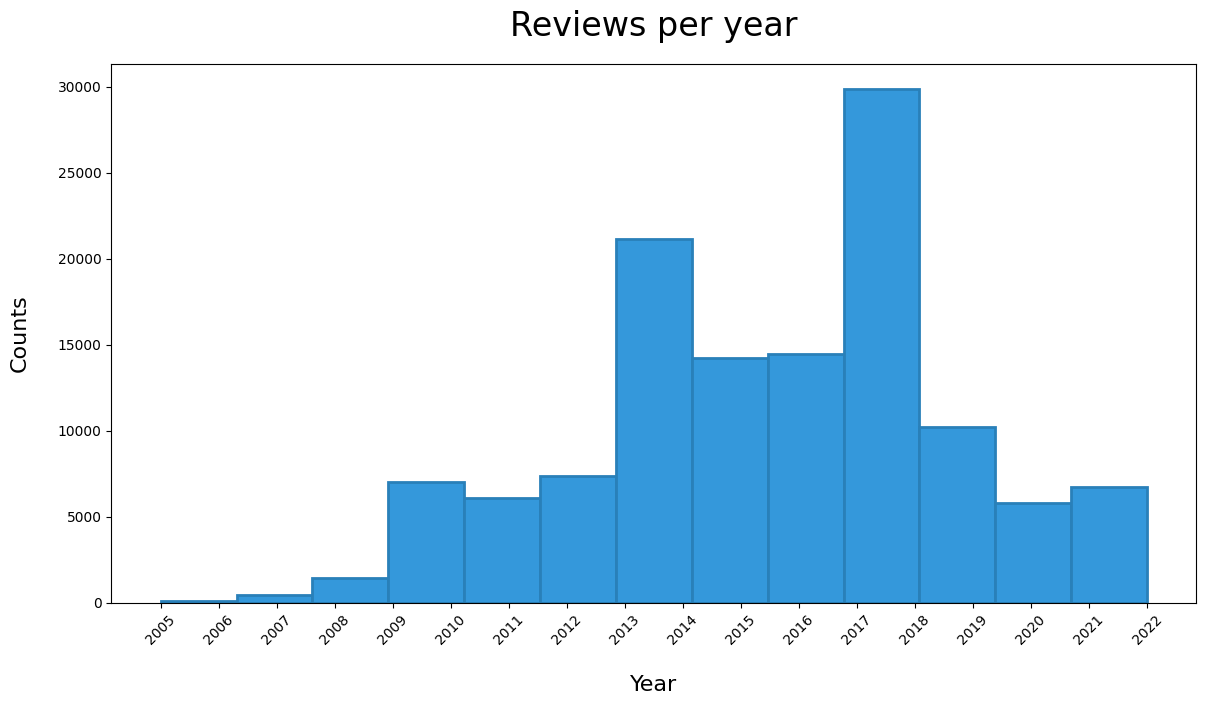

In [ ]:
# Histogram plot of Restaurant Reviews per Year

def make_histogram(dataset, attribute, bins=13, bar_color='#3498db', edge_color='#2980b9', title='Title', xlab='X', ylab='Y', sort_index=False):
        
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.set_title(title, fontsize=24, pad=20)
    ax.set_xlabel(xlab, fontsize=16, labelpad=20)
    ax.set_ylabel(ylab, fontsize=16, labelpad=20)
    
    plt.hist(dataset[attribute], bins=bins, color=bar_color, ec=edge_color, linewidth=2) 
    plt.xticks(rotation=45)
    
make_histogram(restaurant_sorted, 'year', title='Reviews per year', xlab='Year', ylab='Counts')

In [ ]:
# Filtering for Restaurant/Food Reviews from 2015-2022

restaurant_reviews['year'] = restaurant_reviews['year'].astype(int)
restaurant_reviews = restaurant_reviews[restaurant_reviews['year'] >= 2015]

# Overview of our Final Reviews Dataset, left with 81246 rows of Data

print(restaurant_reviews.shape)
restaurant_reviews.head()

(81246, 11)


,user_id,business_id,stars,useful,funny,cool,text,date,year,month,time
0,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,2018,07,22:09:11
1,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,2015,01,00:01:03
6,Jha0USGDMefGFRLik_xFQg,bMratNjTG5ZFEA6hVyr-xQ,5,0,0,0,First time there and it was excellent!!! It fe...,2017-02-19 13:32:05,2017,02,13:32:05
7,QzCEzH3R7Z6erOGLr3t55Q,0pMj5xUAecW9o1P35B0AMw,5,1,0,1,Great staff always helps and always nice. Alwa...,2017-05-26 13:10:24,2017,05,13:10:24
8,aFa96pz67TwOFu4Weq5Agg,kq5Ghhh14r-eCxlVmlyd8w,5,0,0,0,My boyfriend and I tried this deli for the fir...,2018-08-23 21:39:38,2018,08,21:39:38


In [ ]:
# Checking for Null Values

restaurant_reviews.isnull().sum()

user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
year           0
month          0
time           0
dtype: int64

Thus, there are 81246 rows of reviews data for Restaurants and Food outlets in the city of Philadelphia.

###**User File**

In [ ]:
#Importing the User file
import pandas as pd

json_path = '/content/drive/MyDrive/yelp_academic_dataset_user.json'

# read the first 10 rows of the JSON file using pandas
users_df = pd.read_json(json_path, lines=True, nrows=100000)



In [ ]:
# Filtering for Active Yelp Users who have completed at least 5 reviews

users_df = users_df[users_df['review_count'] >= 5]

# Overview of our JSON Dataframe

print(users_df.shape)
users_df.sample(10)

(89029, 22)


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
53105,V7-EP1CbhjQeEq7f6ab3DQ,Gregory,38,2014-05-30 01:07:49,31,6,2,,"_xn1ACKd_rLkqAsckh8nRQ, cNHYa87GDN2U6obTG3HgLw...",0,2.40,0,0,0,0,0,3,0,0,0,0,0
12808,ILicYV0XNcbfiWEgWlIZ8g,Lauren,192,2008-12-29 23:26:51,363,148,178,"2012,2013,2014","uq0ILmBm-vK3219Y7YwoFw, oCnLbe9OGnpyQBY4E90bVQ...",13,4.23,18,6,1,1,0,20,42,19,19,7,2
31650,1Joz74rgk1z6IiRRAg9tWA,Veronica,18,2009-04-16 01:21:28,45,32,18,,"qAy-z88lPAyjwq-pRCFmSw, Pn1fG68yP5RXQd1lUVPNjQ...",3,2.92,0,0,0,0,0,0,0,2,2,0,1
37579,11WJWQGMZqZq0VBvUBC4wg,Cynthia,16,2013-11-20 05:15:11,5,0,4,,"ShNLdJa5lxOaHKhUjtfnSw, KqcUagSIw6qB35kFSKTd0Q...",1,3.88,0,0,0,0,0,0,1,1,1,1,0
63149,oHvON83dyMDSCy-pNfUvrQ,Sonia,10,2017-01-07 19:34:22,4,0,6,,"fRVMtlGgvsfGjwowWsgmXw, GCqJZHGhnz3p4LJjZ4zvsQ...",0,5.00,0,0,0,0,0,0,0,0,0,0,0
4085,zSqJA00ftSH2MlW67lThmA,Fara,19,2010-09-04 09:51:29,162,16,151,,"oVqTs1sJC_x4qo2MHgsPzg, hugwdfY5g0Pr47nnA4_qQg...",2,3.85,1,0,0,0,0,1,1,1,1,1,2
28248,KwQrZ_DV3brdsIIbSswdiQ,Catherine,11,2011-10-21 00:28:24,21,2,9,,"lCZm-RzgrfxtINJVPaMEFQ, OGSQhTcwfmuXQ4__n2XNtg...",0,4.18,0,0,0,0,0,0,2,0,0,0,0
27114,JpP_py_dXB7EONT5Exri7w,Leslie,265,2011-04-07 23:30:54,402,109,228,,"b-AquLl5M-tS4Q368PTR0w, vgd6a2efSYmm_gVkcNt44Q...",15,3.94,11,3,0,3,0,18,33,30,30,7,34
85554,A5EG6HaHHXgtXI5xTTE_9A,Tyron,11,2012-12-04 01:29:05,8,1,2,,"OTCtwRRgJo0hPXh-hrX4lg, NdMfBsPE98sbg66nIeRCPA...",0,4.00,0,0,0,0,0,0,1,0,0,1,0
51859,_0u86uCYwst3NvSKsKjodg,Catherine,5,2013-02-07 16:39:50,3,1,0,,"AVWimjUtL96yJ6JpaGUJ3g, 1M7TyiO2KM0Hzov0TauJTQ...",0,3.40,0,0,0,0,0,1,0,1,1,0,0


In [ ]:
# Number of unique active users in our user_df dataset

n_users = len(users_df.user_id.unique())
n_users # 89029 unique active users

89029

In [ ]:
# Checking for Null Values

users_df.isnull().sum()

user_id               0
name                  0
review_count          0
yelping_since         0
useful                0
funny                 0
cool                  0
elite                 0
friends               0
fans                  0
average_stars         0
compliment_hot        0
compliment_more       0
compliment_profile    0
compliment_cute       0
compliment_list       0
compliment_note       0
compliment_plain      0
compliment_cool       0
compliment_funny      0
compliment_writer     0
compliment_photos     0
dtype: int64

###**Finalizing the Dataset for Restaurants Business**

In [ ]:
# Number of Restaurant Businesses in the state of Pennsylvania

business_food.state.value_counts()

PA    8078
Name: state, dtype: int64

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.]),
 [Text(0.0, 0, '0'),
  Text(500.0, 0, '500'),
  Text(1000.0, 0, '1000'),
  Text(1500.0, 0, '1500'),
  Text(2000.0, 0, '2000'),
  Text(2500.0, 0, '2500'),
  Text(3000.0, 0, '3000'),
  Text(3500.0, 0, '3500'),
  Text(4000.0, 0, '4000')])

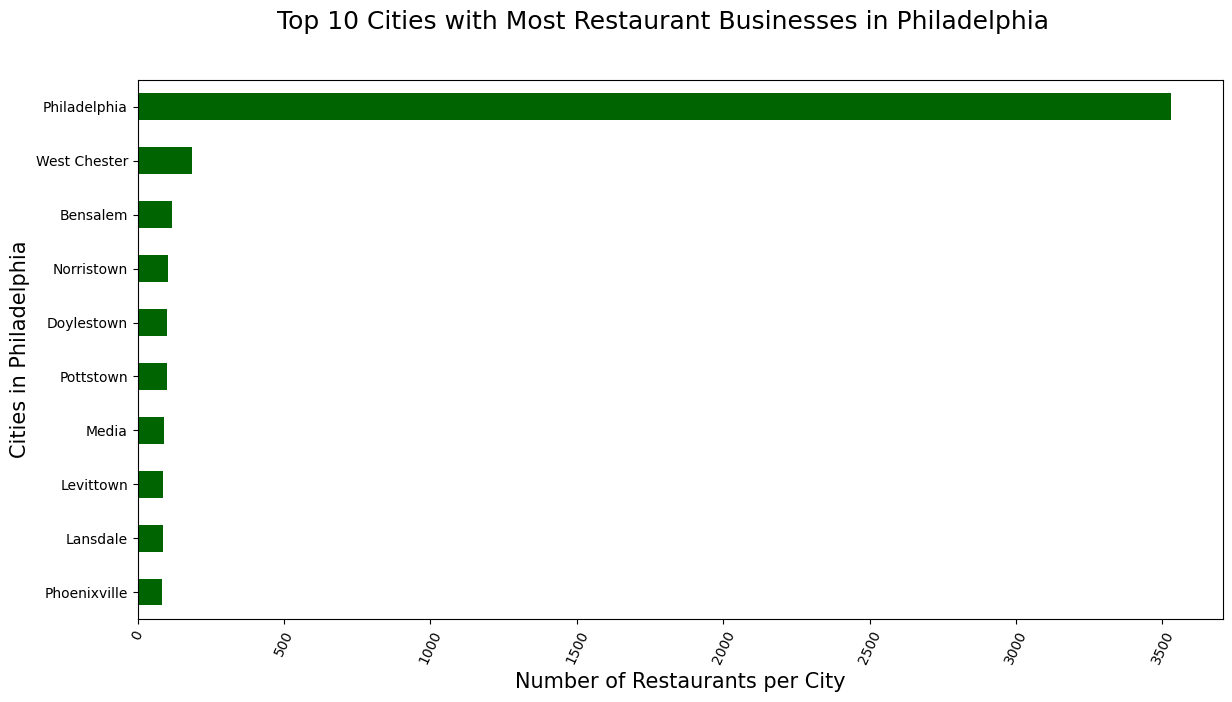

In [ ]:
# Distribution of Cities with Most Restaurant Businesses in Pennsylvania

#business_on = business_food[business_food['state']=='PA']
philadelphia_cities = business_food['city']
top_cities = philadelphia_cities.value_counts().head(10)
top_cities.sort_values(inplace=True)

fig, ax = plt.subplots(figsize=(14, 7), )
fig.suptitle('Top 10 Cities with Most Restaurant Businesses in Philadelphia', fontsize=18)

top_cities.plot(kind = 'barh', color= 'darkgreen')

plt.ylabel('Cities in Philadelphia', fontsize=15)
plt.xlabel('Number of Restaurants per City', fontsize=15)
plt.xticks(rotation=65)

**Observation :** Based on the above plot, we observed that the business data is heavily skewed with the city of Philadelphia having the majority of the business data. Hence, it will be more concise to focus just on the city of Philadelphia and drop the rest of the cities in the state of Pennsylvania.

In [ ]:
# Filtering for Restaurant Business Data in the city of Philadelphia

business_philadelphia = business_food[business_food['city'] == 'Philadelphia']
print(business_philadelphia.shape)
business_philadelphia.head()

(3529, 12)


,business_id,name,city,state,stars,review_count,categories,latitude,longitude,is_open,postal_code,key
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,Philadelphia,PA,4.0,80,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",39.955505,-75.155564,1,19107,MTSW4McQd7CbVtyjqoe9mw
15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,Philadelphia,PA,4.0,245,"Sushi Bars, Restaurants, Japanese",39.953949,-75.143226,1,19106,MUTTqe8uqyMdBl186RmNeA
19,ROeacJQwBeh05Rqg7F6TCg,BAP,Philadelphia,PA,4.5,205,"Korean, Restaurants",39.943223,-75.162568,1,19147,ROeacJQwBeh05Rqg7F6TCg
35,aPNXGTDkf-4bjhyMBQxqpQ,Craft Hall,Philadelphia,PA,3.5,65,"Eatertainment, Arts & Entertainment, Brewpubs,...",39.962582,-75.135657,1,19123,aPNXGTDkf-4bjhyMBQxqpQ
82,ppFCk9aQkM338Rgwpl2F5A,Wawa,Philadelphia,PA,3.0,56,"Restaurants, Automotive, Delis, Gas Stations, ...",39.954573,-75.194894,1,19104,ppFCk9aQkM338Rgwpl2F5A


After filtering, we are left with 3529 Restaurant Businesses Data in the city of Philadelphia in our dataset.

In [ ]:
# Filtering for Yelp Customer Reviews for our final Restaurant Business Dataset

business_philadelphia['key'] = business_philadelphia.iloc[:,0]
reviews_final_df = restaurant_reviews[restaurant_reviews['business_id'].isin(business_philadelphia['key'])]
reviews_final_df = reviews_final_df.reset_index().iloc[:,1:]
print(reviews_final_df.shape)
reviews_final_df.head()

(48449, 11)


<ipython-input-37-962f1963d515>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  business_philadelphia['key'] = business_philadelphia.iloc[:,0]


,user_id,business_id,stars,useful,funny,cool,text,date,year,month,time
0,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,2015,01,00:01:03
1,aFa96pz67TwOFu4Weq5Agg,kq5Ghhh14r-eCxlVmlyd8w,5,0,0,0,My boyfriend and I tried this deli for the fir...,2018-08-23 21:39:38,2018,08,21:39:38
2,G0DHgkSsDozqUPWtlxVEMw,oBhJuukGRqPVvYBfTkhuZA,4,0,0,0,The only reason I didn't give this restaurant ...,2015-03-05 03:37:54,2015,03,03:37:54
3,mNITUu6B2wUKBOa4NmUHJg,NQSnr4RPUScss607oxOaqw,5,0,0,0,My brother came to visit and we wanted to pick...,2016-05-19 06:10:14,2016,05,06:10:14
4,aWlojpSpzEICTza3RgGJgg,SIoCIxjn4jLt2O-4DajWJw,4,0,0,0,My go-to spot on a Saturday night! I was real ...,2015-11-18 17:47:29,2015,11,17:47:29


After filtering, we are now left with 48449 rows of Yelp User Reviews Data for our 3529 Restaurant Businesses in Philadelphia.

In [ ]:
# Create a new column in reviews_final_df with the user ids
reviews_final_df['key'] = reviews_final_df['user_id']

# Select the rows in users_df that have user ids in reviews_final_df
users_final_df = users_df[users_df['user_id'].isin(reviews_final_df['key'])]

# Count the number of active users
num_unique_users = len(users_final_df['user_id'].unique())

# Print the number of active users

print(f"There are {num_unique_users} unique active Yelp users.")

There are 6947 unique active Yelp users.


After Filtering, we are finally left with 6947 active unique Yelp User Data for 48449 Yelp User Reviews Data for 3529 Restaurant Businesses in Philadelphia. 

###Saving Dataframes into the respective CSV Files to be used further

In [ ]:
import os

# Specify the directory path
directory_path = 'Data_HungerMonkey/Part_1'

# Create the directory path if it does not already exist
if not os.path.exists(directory_path):
    os.makedirs(directory_path)

In [ ]:
business_philadelphia.to_csv("Data_HungerMonkey/Part_1/business_final.csv', index=False")

In [ ]:
# Save reviews_final_df into csv file

reviews_final_df.to_csv("Data_HungerMonkey/Part_1/reviews_final_11.csv")

In [ ]:
# Save users_final_df into csv file

users_final_df.to_csv("Data_HungerMonkey/Part_1/users_final.csv")